# **Quantum Mechanics course (4th semester) - Lopatenko, Zhuikov**
----

In [37]:
# TODO:
# [x] feat plotted functions normalization
# [x] add theory

Как известно, в квантовой механике определить траекторию электрона в атоме принципиально невозможно.

Поэтому в этом моделировании представленызамечания о вероятностном характере движения отрицательно заряженных частиц, формируемом функцией $W\equiv W(x,y,z,t)$

В случае стационарных состояний атома вероятность нахождения электрона в области не зависит от времени и выражается по квадравту волновой функции:
\begin{equation}
W=\int\limits_V \left| \Psi\right|^2 dv
\end{equation}

При этом волновая функция отвечает стационарному уравнению Шредингера:
\begin{equation}
\frac{\hbar^2}{2m} \Delta \Psi = (U-E) \Psi
\end{equation}
в котором $E$ обозначает полную энергию частицы, a $U$ - потенциальную энергию кулоновского взаимодействия, которую для системы из заряженной до $e=1.6 \cdot 10^{-19}$ Кл частицы и кратного ей по заряду ядра можно принять за:
\begin{equation}
U = -\frac{1}{4\pi\varepsilon_0}\cdot \frac{ze^2}{r}
\end{equation}

К счастью квантовой теории, уравнение разрешимо для **водородоподобных** атомов.

In [2]:
%config InlineBackend.figure_format = 'retina'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy.typing import ArrayLike
from scipy import special
from random import randint
from math import factorial, sqrt

In [4]:
def check_parameter(param: int):
    if param < 0:
        raise ValueError(f"parameter ({param}) should be non-negative")

Для уравнения Шредингера решения $\Psi \equiv \Psi(r, \theta, \phi)$ часто ищут в сферических координатах:
\begin{equation}
\Psi(r, \theta, \phi) = R(r)Y(\theta, \psi)
\end{equation}
где $Y(\theta, \phi) \:-$  угловая часть $\phi$-функции электрона.

Решать с нуля дифференциальное уравнение не станем, лишь обратимся к математическому аппарату ***полиномов Лежандра***, которые в своем привиденным виде и будут давать общие выражения для угловых функций.

In [5]:
def get_legendre(l: int, x: ArrayLike) -> ArrayLike:
    check_parameter(l)
    if l == 0:
        return 1
    if l == 1:
        return x
    return ((2 * l - 1) * x * get_legendre(l - 1, x) - (l - 1) * get_legendre(l - 2, x)) / l

Получать присоединенные функции Лежандра можно по рекуррентному соотношению:

In [6]:
def get_joined_legendre(l: int, m: int, x: ArrayLike) -> ArrayLike:
    check_parameter(l)
    if m == 0 and l < 2:
        if l == 0: 
            return 1
        if l == 1: 
            return x
    elif m == l:
        return (2 * l - 1) *  np.sqrt(1 - x ** 2) * get_joined_legendre(l - 1, l - 1, x)
    else:
        if l - 1 < m:
            return 0
        elif l - 2 < m:
            return (2 * l - 1) * x * get_joined_legendre(l - 1, m, x) / (l - m)
        else:
            return ((2 * l - 1) * x * get_joined_legendre(l - 1, m, x) - (l - 1 + m) * get_joined_legendre(l - 2, m, x)) / (l - m) 

Проверим значения в многочленах по точкам в оригинальной имплиментации и библиотечных реализациях:

In [19]:
try:
    l, m = randint(0, 10), randint(0, 10)
    assert get_joined_legendre(l, m, np.array([0.5])), (-1) ** m * special.lpmv(m, l, 0.5)
except AssertionError as e:
    print(e)

In [8]:
def get_eiler_entity(m: int, x: ArrayLike):
        return np.e ** (m * x * 1j)

In [25]:
def get_norm_coefficient(l: int, m: int) -> float:
    return sqrt(factorial(abs(l - m)) * (2 * l + 1) / (factorial(l + m) * 4 * np.pi))

Общий вид угловых $\phi$-функций:

$Y_{l, m}(\theta, \phi) = A_{l,m}P_l^m(cos\theta)e^{im\phi}$

In [30]:
def get_module_polar_orbital_trajectory(l: int, m: int, theta: ArrayLike) -> ArrayLike:
    return get_norm_coefficient(l, m) * abs(get_joined_legendre(l, m, np.array(np.cos(theta))) * get_eiler_entity(m, theta)) ** 2

Упростим составления графиков для модулей угловых функций:

In [31]:
def show_polar_possibility_plot(l: int, m: int, theta_start: float, theta_end: float):
    thetas = np.linspace(theta_start, theta_end, 1000)
    ros = get_module_polar_orbital_trajectory(l, m, thetas)
    fig = plt.figure(figsize=(5, 5))
    ax = plt.subplot(1, 1, 1, projection="polar")
    plt.polar(thetas, ros, label=f"Absolute outline for $Y_{l}^{m}$ ")
    ax.set(title=f"Orbital geometrically probabilistic plot l = {l}, m = {m}")
    ax.legend()
    plt.show()

In [32]:
phi_0, phi_1 = 0, 2 * np.pi

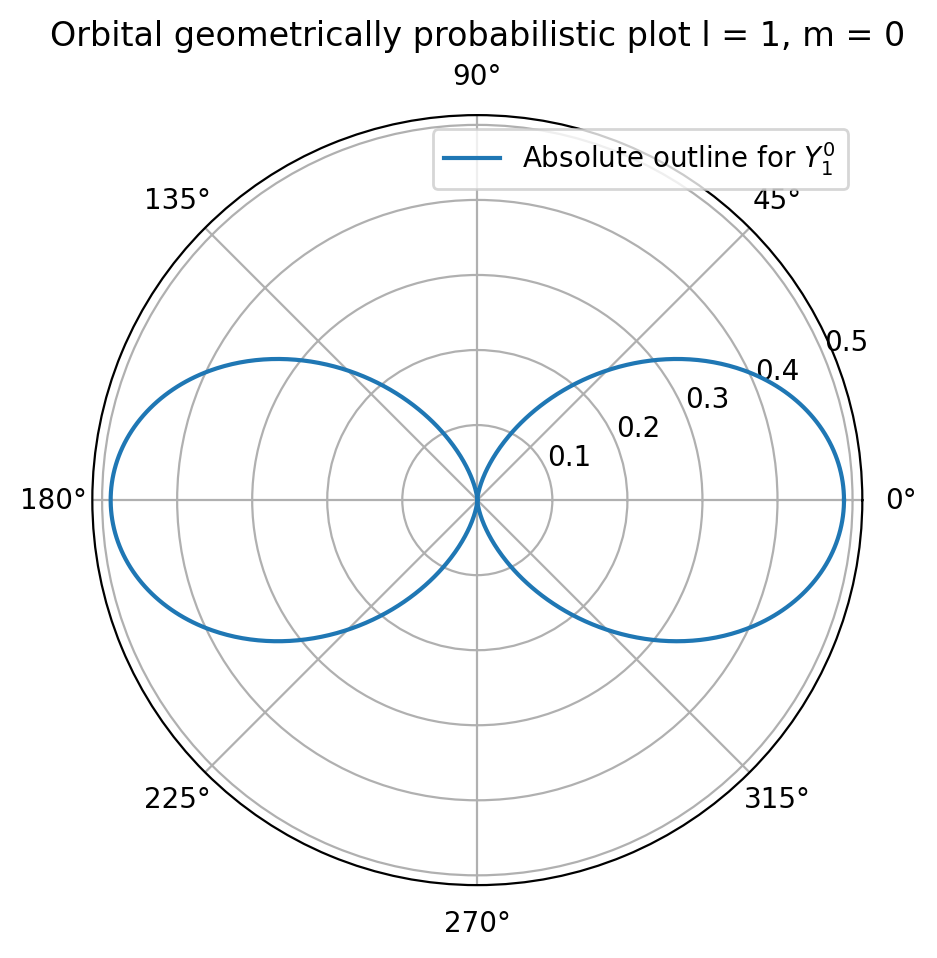

In [33]:
show_polar_possibility_plot(1, 0, phi_0, phi_1)

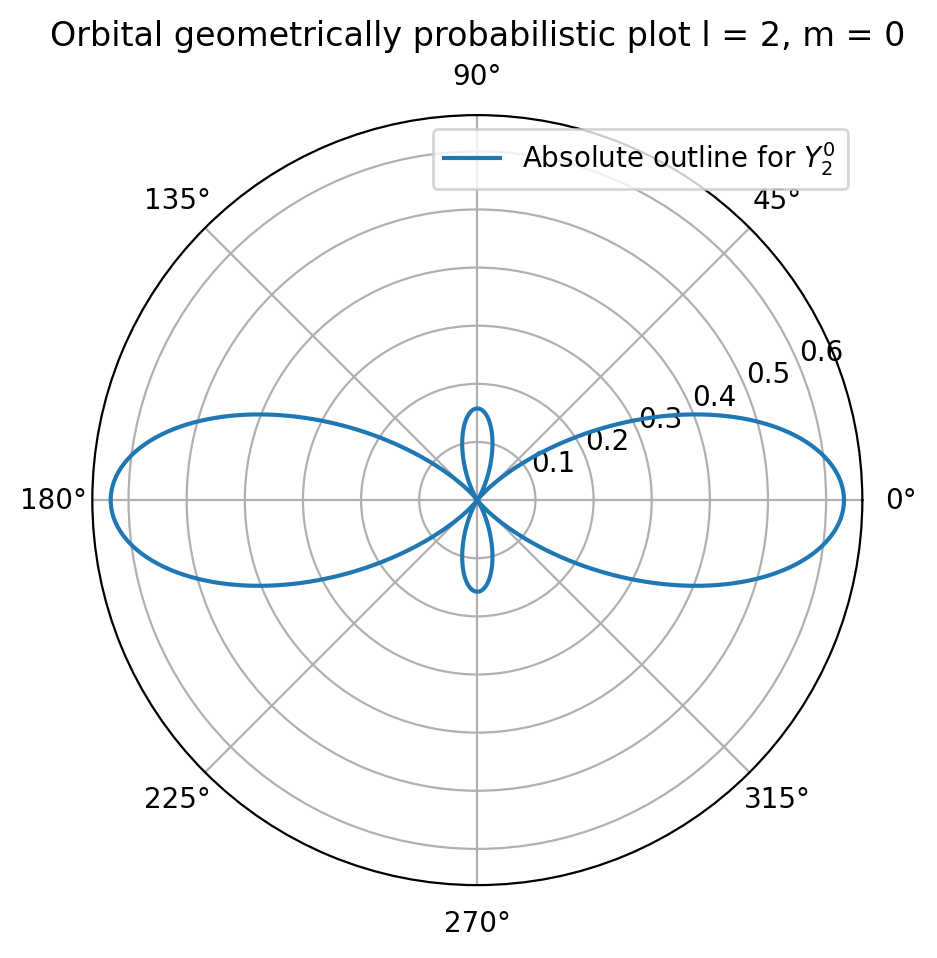

In [34]:
show_polar_possibility_plot(2, 0, phi_0, phi_1)

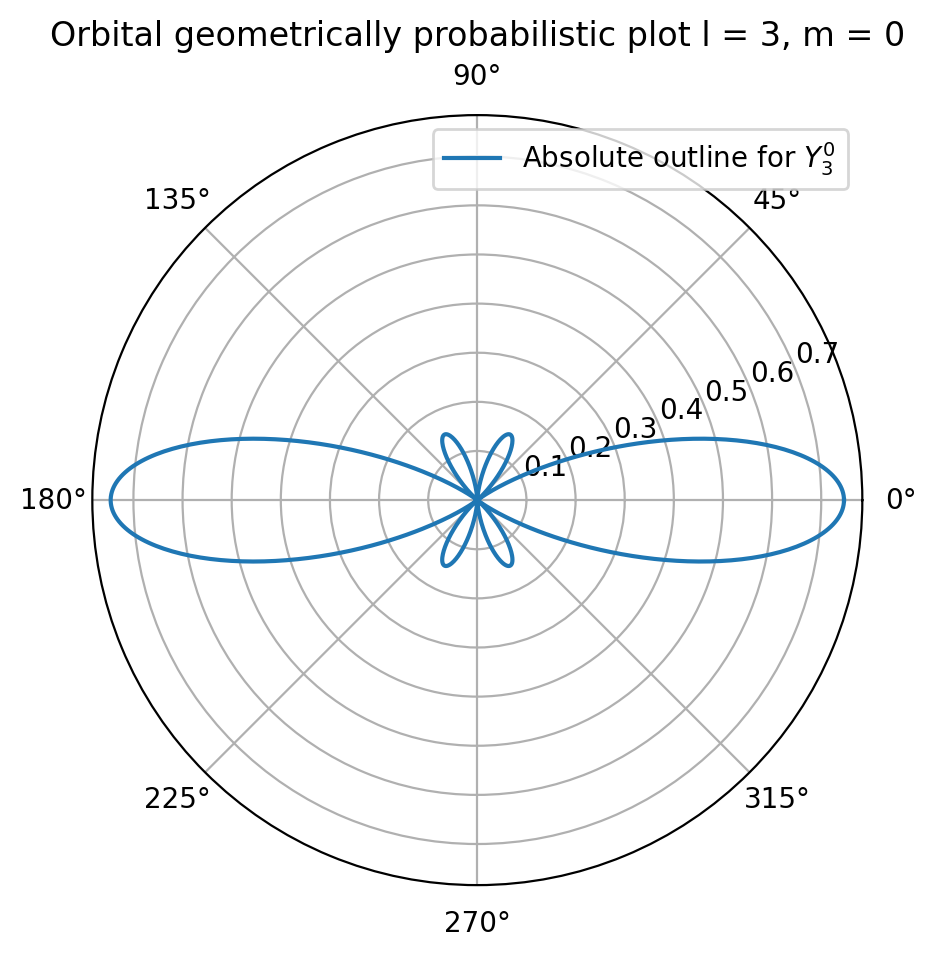

In [35]:
show_polar_possibility_plot(3, 0, phi_0, phi_1)

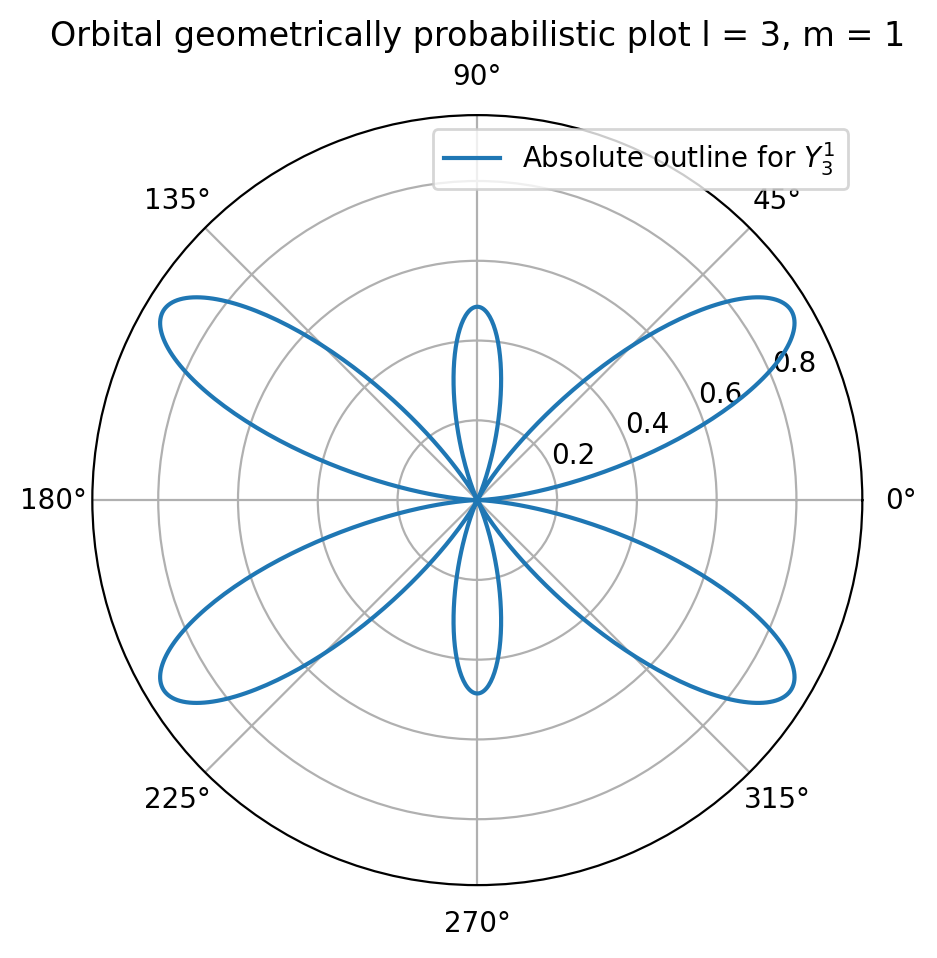

In [36]:
show_polar_possibility_plot(3, 1, phi_0, phi_1)

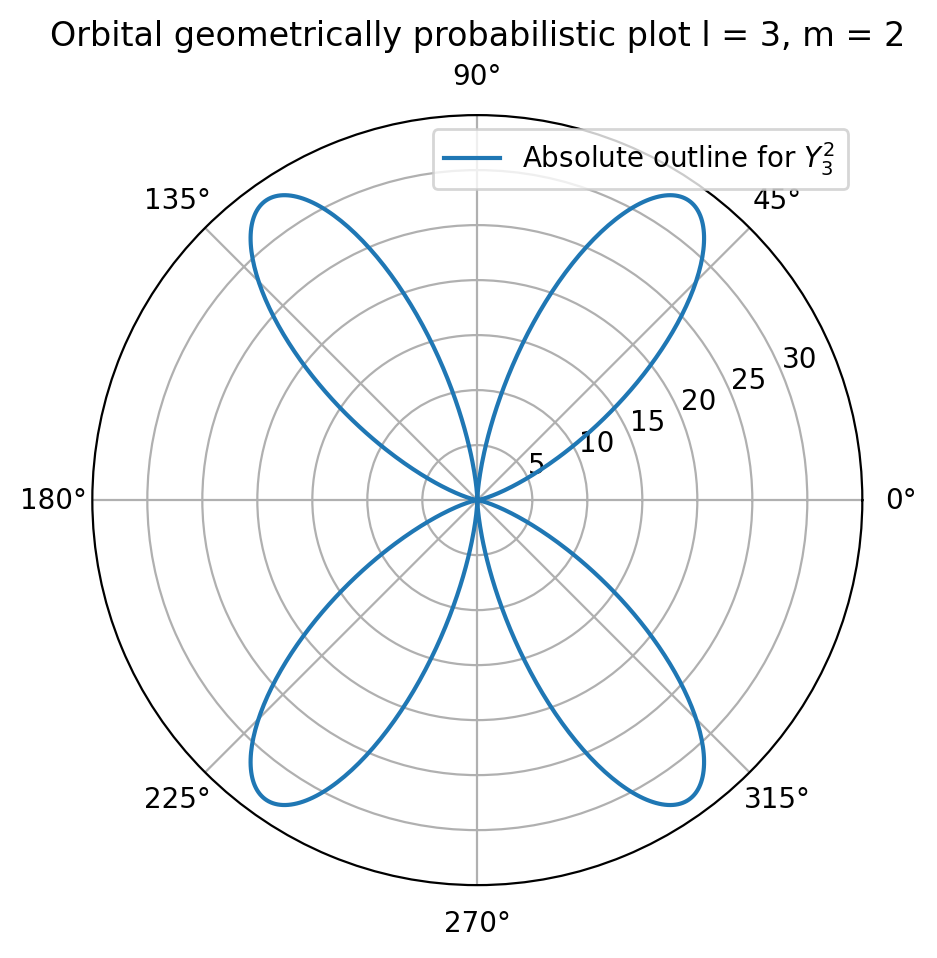

In [16]:
show_polar_possibility_plot(3, 2, phi_0, phi_1)

Изобразим радиальные плотности вероятности для состояний $1s$ и $2s$ атома водорода:

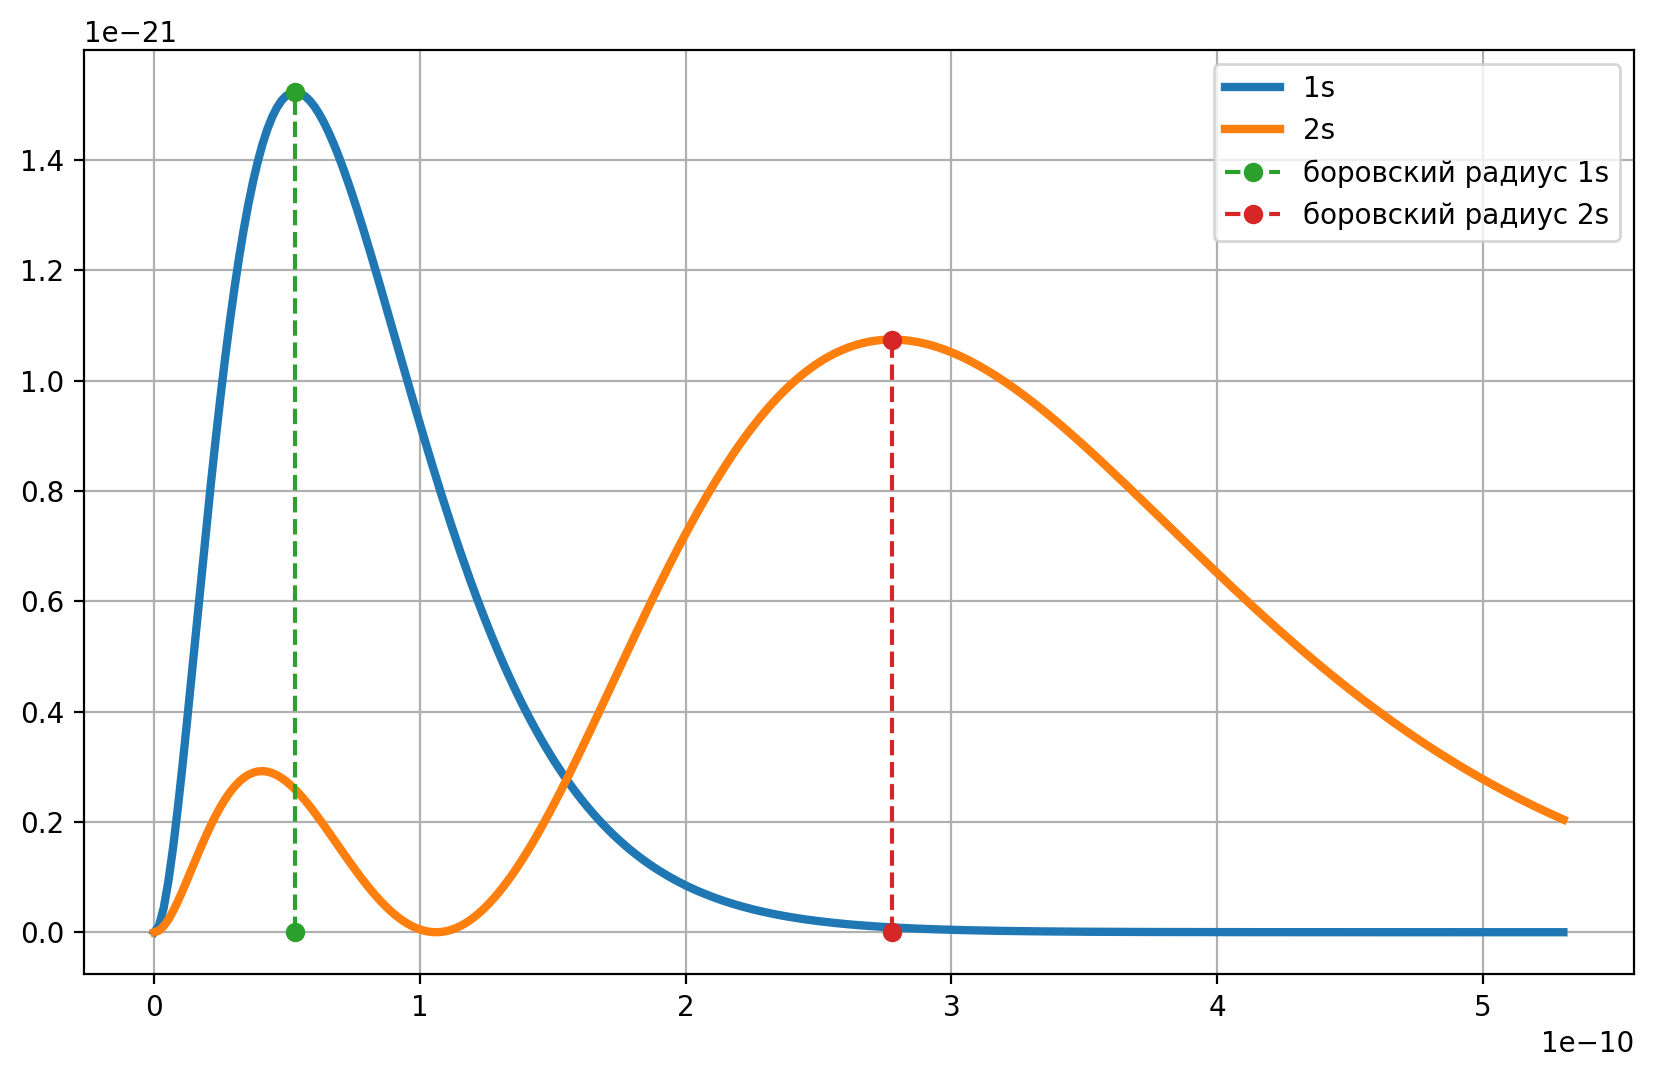

In [17]:
hbar = 1.054e-34
mass_e = 9.1e-31
e = 1.6e-19
eps_0 = 8.85e-12
a = 4 * np.pi * eps_0 * hbar ** 2 / mass_e / e ** 2

def get_R10(r):
    return 4 * r ** 2 * np.e ** (-2 * r / a)
def get_R20(r):
    return 4 * r ** 2 * (2 - r / a) ** 2 * np.e ** (-r / a) / 16

r_linspace = np.linspace(0, 10 * a, 300)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(r_linspace, get_R10(r_linspace), linewidth=3, label="1s")
ax.plot(r_linspace, get_R20(r_linspace), linewidth=3, label="2s")

ax.plot((a, a), (0, get_R10(a)), 'o--', label="боровский радиус 1s")
coeff = 3 + 5 ** 0.5
ax.plot((coeff * a, coeff * a), (0, get_R20(coeff * a)), 'o--', label="боровский радиус 2s")
ax.grid()
ax.legend()
plt.show()

Значение первого боровского радиуса:

In [18]:
4 * np.pi * eps_0 * hbar ** 2 / mass_e / e ** 2

5.3033830816526304e-11

Заметим, что наиболее вероятным отдалелением электрона от атома в состоянии $1s$ стал первый Боровский радиус:
\begin{equation}
a_{1s}=\frac{4\pi\varepsilon_0\hbar^2}{m_e e^2}\approx 0.53 Å
\end{equation}
для состояния $2s$ характерный пик по вероятности составил:
\begin{equation}
a_{2s}=(3+\sqrt{5})\cdot\frac{4\pi\varepsilon_0\hbar^2}{m_e e^2}\approx 2.77 Å
\end{equation}